In [1]:
import numpy as np
import pandas as pd
import sqlite3 as db
from pandasql import sqldf 
import matplotlib.pyplot as plt
import scipy.stats as stats


In [2]:
conn = db.connect("sqladb.db")

In [3]:
cursor = conn.cursor()
cursor.execute('''CREATE TABLE Adult_Table(id INTEGER PRIMARY KEY, age INTEGER, workclass TEXT, fnlwgt INTEGER, education TEXT,
Col4 INTEGER, maritalstatus TEXT,
occupation TEXT, relationship TEXT, race TEXT, sex TEXT, capitalgain INTEGER, 
capitalloss INTEGER, hoursperweek INTEGER, nativecountry TEXT, weight TEXT) ''')
conn.commit()

OperationalError: table Adult_Table already exists

In [6]:
df1 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                  names=['age' , 'workclass' , 'fnlwgt' , 'education','Col4', 'maritalstatus','occupation', 
                         'relationship' , 'race' , 'sex' , 'capitalgain' , 
                        'capitalloss' , 'hoursperweek' , 'nativecountry', 'weight'], index_col = False)

In [7]:
df1

,age,workclass,fnlwgt,education,Col4,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,weight
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [8]:
cursor = conn.cursor()

In [9]:
df1.to_sql(name = 'Adult_Table', con = conn, if_exists = 'replace')

In [102]:
resultset = conn.execute("SELECT * FROM Adult_Table")

In [103]:
rows = resultset.fetchall()
i = 0.00001
tot = 0
for row in rows:
    if row[10].strip() == "Male":      
        tot = tot + row[13]
        i = i + 1
avg = tot / i

print(avg)               

42.42808625863787


In [39]:
cursor = conn.cursor()
resultset = conn.execute("SELECT * FROM sql_adb")
df_from_Sql = pd.DataFrame(resultset.fetchall() , columns= ['id','age' , 'workclass' , 'fnlwgt' , 'education','Col4', 'maritalstatus','occupation' , 
                         'relationship' , 'race' , 'sex' , 'capitalgain' , 
                        'capitalloss' , 'hoursperweek' , 'nativecountry', 'weight'])

In [40]:
df_from_Sql

,id,age,workclass,fnlwgt,education,Col4,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,weight
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [41]:
education_Freq = pd.value_counts(df_from_Sql['education']).to_frame().reset_index()
education_Freq.columns = ['education column','Count']


In [42]:
education_Freq

,education column,Count
0,HS-grad,10501
1,Some-college,7291
2,Bachelors,5355
3,Masters,1723
4,Assoc-voc,1382
5,11th,1175
6,Assoc-acdm,1067
7,10th,933
8,7th-8th,646
9,Prof-school,576


In [43]:
occupation_Freq = pd.value_counts(df_from_Sql['occupation']).to_frame().reset_index()
occupation_Freq.columns = ['occupation column','Count']

In [15]:
occupation_Freq

,occupation column,Count
0,Prof-specialty,4140
1,Craft-repair,4099
2,Exec-managerial,4066
3,Adm-clerical,3770
4,Sales,3650
5,Other-service,3295
6,Machine-op-inspct,2002
7,?,1843
8,Transport-moving,1597
9,Handlers-cleaners,1370


In [44]:
relationship_Freq = pd.value_counts(df_from_Sql['relationship']).to_frame().reset_index()
relationship_Freq.columns = ['relationship column','Count']

In [45]:
relationship_Freq

,relationship column,Count
0,Husband,13193
1,Not-in-family,8305
2,Own-child,5068
3,Unmarried,3446
4,Wife,1568
5,Other-relative,981


In [69]:
Count = 0
for i in range(len(df_from_Sql['id'])):
    val = df_from_Sql.loc[i, 'maritalstatus'].split('-')
    if(val[0].strip()) =='Married':
        if(df_from_Sql.loc[i, 'workclass'].strip()) == 'Private':
            if(df_from_Sql.loc[i, 'education'].strip()) == 'Masters':
                Count += 1
            

print(Count , "people who are married, working in private sector and having a masters degree")    

540 people who are married, working in private sector and having a masters degree


In [70]:
people_groups = df_from_Sql.groupby("workclass")

In [76]:
people_groups.age.min()

workclass
 ?                   17
 Federal-gov         17
 Local-gov           17
 Never-worked        17
 Private             17
 Self-emp-inc        17
 Self-emp-not-inc    17
 State-gov           17
 Without-pay         19
Name: age, dtype: int64

In [77]:
people_groups.age.max()

workclass
 ?                   90
 Federal-gov         90
 Local-gov           90
 Never-worked        30
 Private             90
 Self-emp-inc        84
 Self-emp-not-inc    90
 State-gov           81
 Without-pay         72
Name: age, dtype: int64

In [186]:
people_groups.age.mean()

workclass
 ?                   40.960240
 Federal-gov         42.590625
 Local-gov           41.751075
 Never-worked        20.571429
 Private             36.797585
 Self-emp-inc        46.017025
 Self-emp-not-inc    44.969697
 State-gov           39.436055
 Without-pay         47.785714
Name: age, dtype: float64

In [135]:
country_groups = df_from_Sql.groupby("nativecountry")

In [144]:
group_split = [g[1] for g in list(country_groups)]

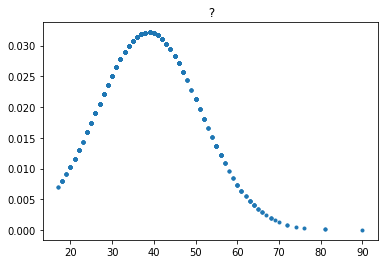

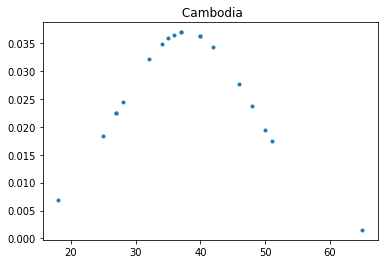

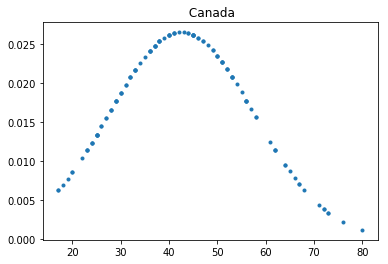

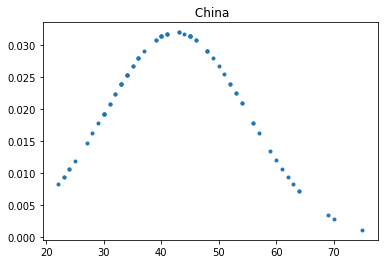

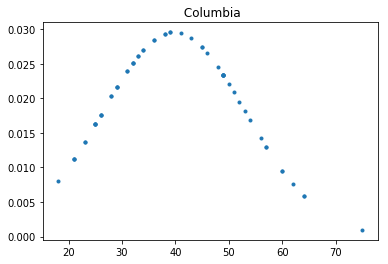

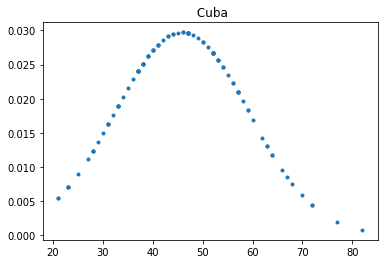

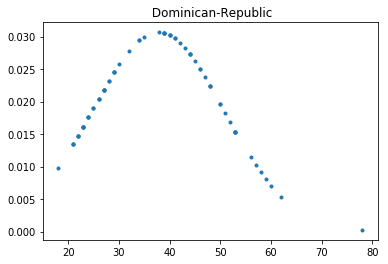

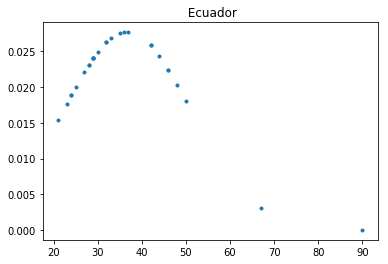

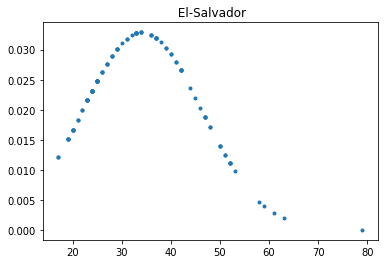

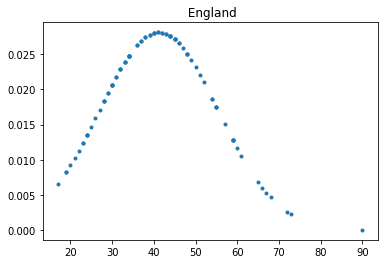

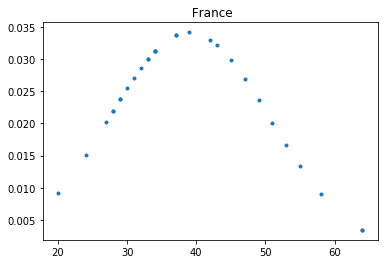

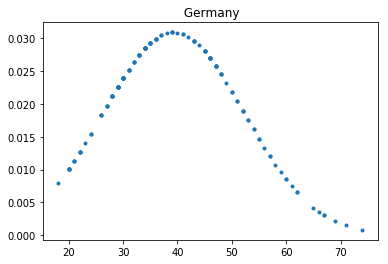

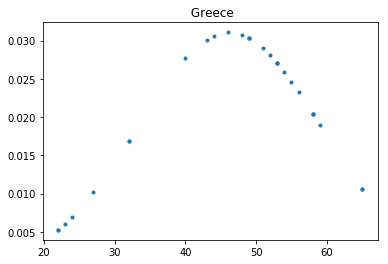

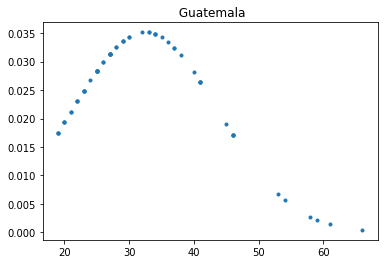

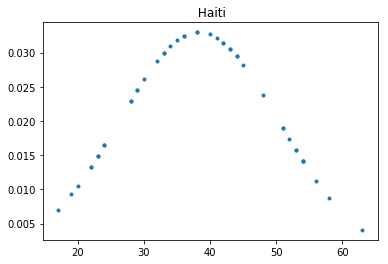

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1652: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)


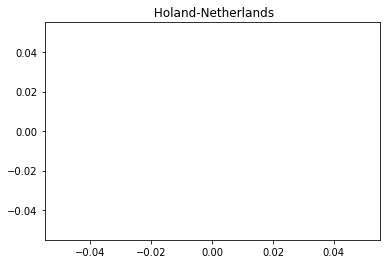

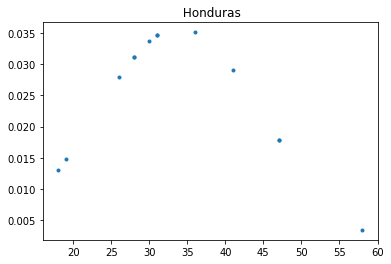

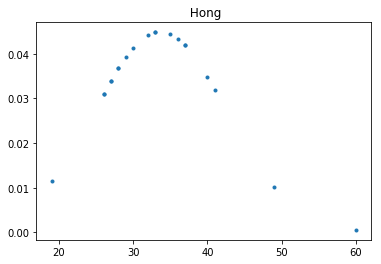

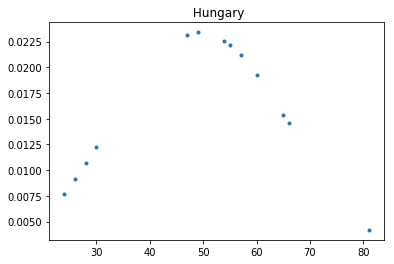

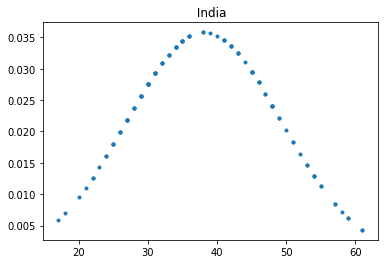

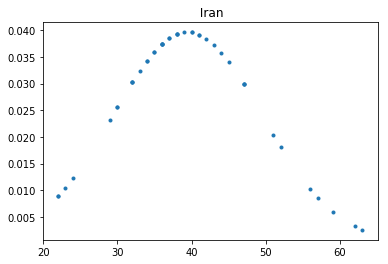

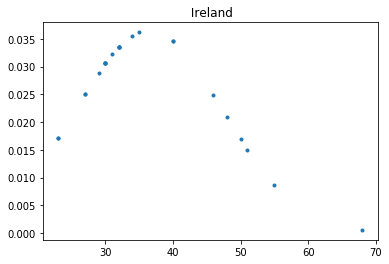

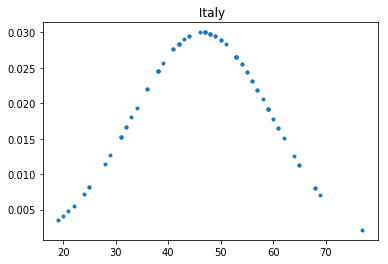

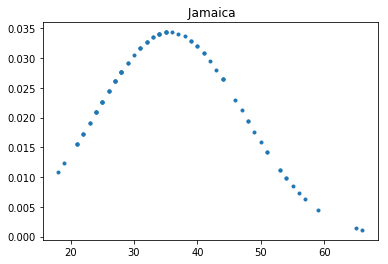

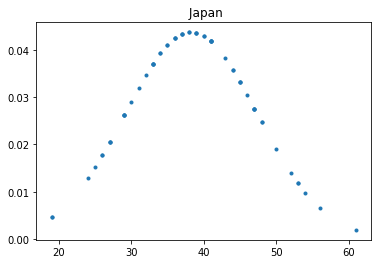

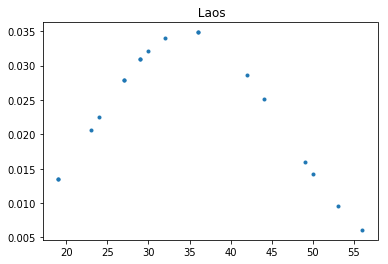

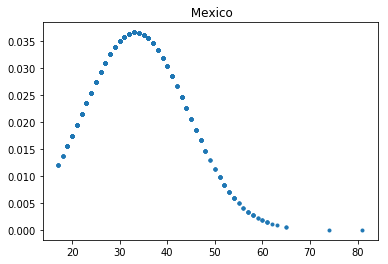

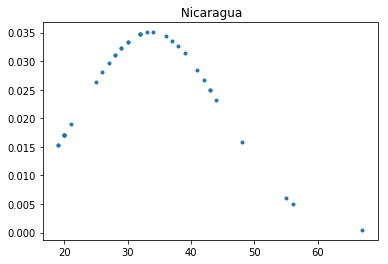

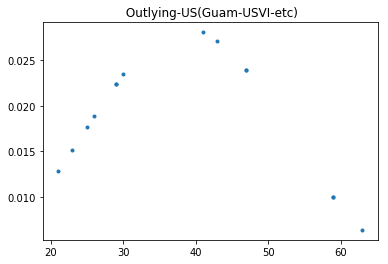

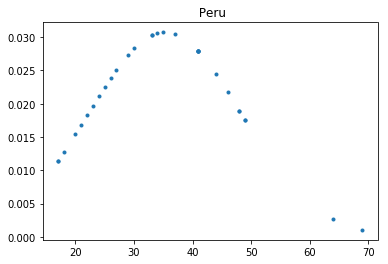

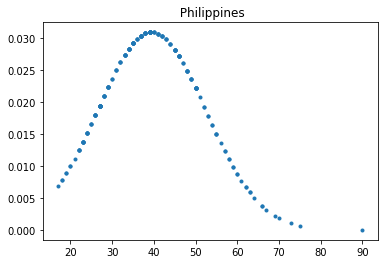

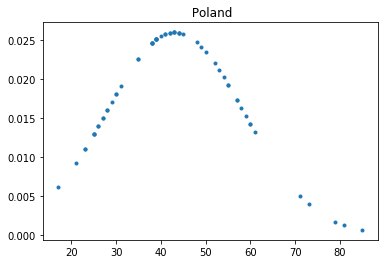

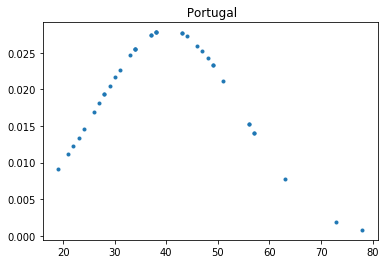

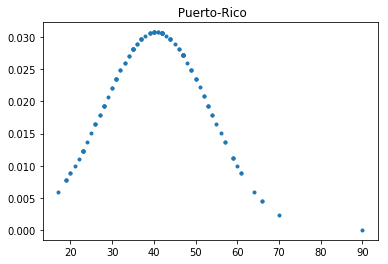

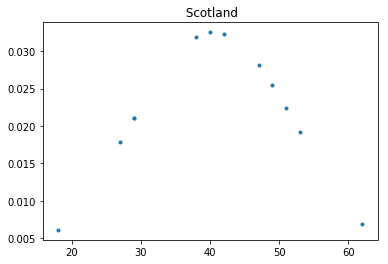

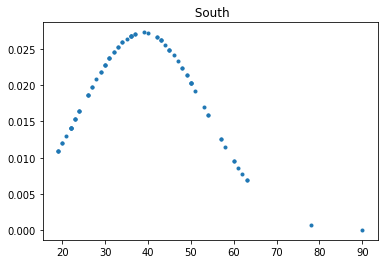

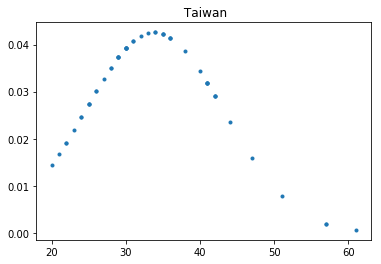

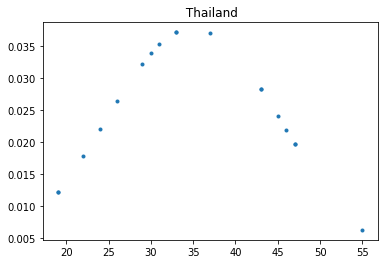

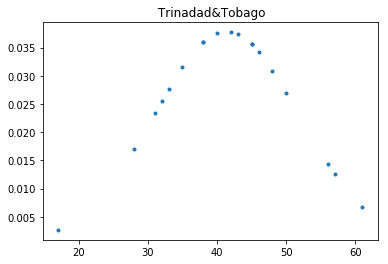

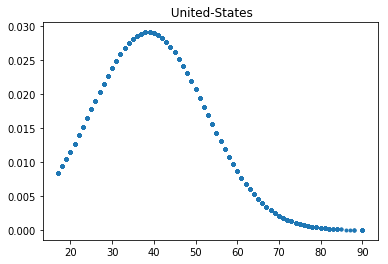

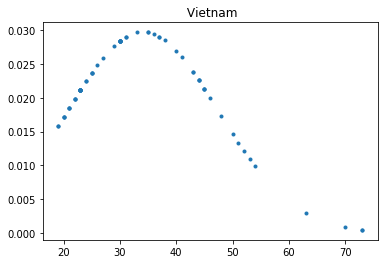

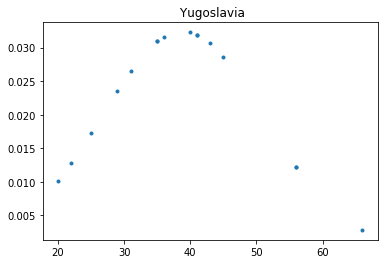

In [203]:
#Distribution of age for every country

for i in range(len(group_split)):
    split_table = group_split[i]
    table_age = split_table['age']
    age_mean = np.mean(table_age)
    age_std = np.std(table_age)

    pdf = stats.norm.pdf(table_age, age_mean, age_std)

    plt.title(split_table.loc[split_table.first_valid_index(), 'nativecountry'])
    plt.plot(split_table['age'], pdf, '.')
    plt.show()

In [221]:
NetCapitalGain = []

for i in range(len(df_from_Sql['age'])):
    out = df_from_Sql.loc[i,'capitalgain'] - df_from_Sql.loc[i,'capitalloss']
    NetCapitalGain.append(out)

new_Column = pd.Series(NetCapitalGain, name='Net-Capital-Gain')

In [220]:
new_Column

0         2174
1            0
2            0
3            0
4            0
5            0
6            0
7            0
8        14084
9         5178
10           0
11           0
12           0
13           0
14           0
15           0
16           0
17           0
18           0
19           0
20           0
21           0
22           0
23       -2042
24           0
25           0
26           0
27           0
28           0
29           0
         ...  
32531        0
32532        0
32533        0
32534        0
32535        0
32536        0
32537        0
32538    15020
32539        0
32540        0
32541        0
32542        0
32543        0
32544        0
32545        0
32546        0
32547        0
32548     1086
32549        0
32550        0
32551        0
32552        0
32553        0
32554        0
32555        0
32556        0
32557        0
32558        0
32559        0
32560    15024
Name: Net-Capital-Gain, Length: 32561, dtype: int64

In [4]:
from sqlalchemy import *
from sqlalchemy import Column, ForeignKey, Integer, String
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import create_engine
Base = declarative_base()
from sqlalchemy.orm import sessionmaker

In [5]:
engine = create_engine('sqlite:///sqladb.db')

In [6]:
engine.echo = True  # We want to see the SQL we're creating

metadata = MetaData(engine)

# The users table already exists, so no need to redefine it. Just
# load it from the database using the "autoload" feature.
adult_data = Table('Adult_Table', metadata, autoload=True)

2018-08-31 18:16:53,318 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1


INFO:sqlalchemy.engine.base.Engine:SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1


2018-08-31 18:16:53,339 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-08-31 18:16:53,342 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1


INFO:sqlalchemy.engine.base.Engine:SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1


2018-08-31 18:16:53,344 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-08-31 18:16:53,347 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Adult_Table")


INFO:sqlalchemy.engine.base.Engine:PRAGMA table_info("Adult_Table")


2018-08-31 18:16:53,350 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-08-31 18:16:53,357 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Adult_Table' AND type = 'table'


INFO:sqlalchemy.engine.base.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Adult_Table' AND type = 'table'


2018-08-31 18:16:53,359 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-08-31 18:16:53,363 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("Adult_Table")


INFO:sqlalchemy.engine.base.Engine:PRAGMA foreign_key_list("Adult_Table")


2018-08-31 18:16:53,365 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-08-31 18:16:53,368 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Adult_Table' AND type = 'table'


INFO:sqlalchemy.engine.base.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Adult_Table' AND type = 'table'


2018-08-31 18:16:53,369 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-08-31 18:16:53,376 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("Adult_Table")


INFO:sqlalchemy.engine.base.Engine:PRAGMA index_list("Adult_Table")


2018-08-31 18:16:53,378 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-08-31 18:16:53,381 INFO sqlalchemy.engine.base.Engine PRAGMA index_info("ix_Adult_Table_index")


INFO:sqlalchemy.engine.base.Engine:PRAGMA index_info("ix_Adult_Table_index")


2018-08-31 18:16:53,384 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-08-31 18:16:53,387 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("Adult_Table")


INFO:sqlalchemy.engine.base.Engine:PRAGMA index_list("Adult_Table")


2018-08-31 18:16:53,389 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-08-31 18:16:53,392 INFO sqlalchemy.engine.base.Engine PRAGMA index_info("ix_Adult_Table_index")


INFO:sqlalchemy.engine.base.Engine:PRAGMA index_info("ix_Adult_Table_index")


2018-08-31 18:16:53,394 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


2018-08-31 18:16:53,398 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Adult_Table' AND type = 'table'


INFO:sqlalchemy.engine.base.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Adult_Table' AND type = 'table'


2018-08-31 18:16:53,399 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


In [156]:
s = adult_data.select()
rs = s.execute()
row = rs.fetchone()

2018-08-30 17:57:05,725 INFO sqlalchemy.engine.base.Engine SELECT "Adult_Table"."index", "Adult_Table".age, "Adult_Table".workclass, "Adult_Table".fnlwgt, "Adult_Table".education, "Adult_Table"."Col4", "Adult_Table".maritalstatus, "Adult_Table".occupation, "Adult_Table".relationship, "Adult_Table".race, "Adult_Table".sex, "Adult_Table".capitalgain, "Adult_Table".capitalloss, "Adult_Table".hoursperweek, "Adult_Table".nativecountry, "Adult_Table".weight 
FROM "Adult_Table"


INFO:sqlalchemy.engine.base.Engine:SELECT "Adult_Table"."index", "Adult_Table".age, "Adult_Table".workclass, "Adult_Table".fnlwgt, "Adult_Table".education, "Adult_Table"."Col4", "Adult_Table".maritalstatus, "Adult_Table".occupation, "Adult_Table".relationship, "Adult_Table".race, "Adult_Table".sex, "Adult_Table".capitalgain, "Adult_Table".capitalloss, "Adult_Table".hoursperweek, "Adult_Table".nativecountry, "Adult_Table".weight 
FROM "Adult_Table"


2018-08-30 17:57:05,728 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


In [7]:
from sqlalchemy.orm import sessionmaker

In [8]:
Session = sessionmaker()


In [9]:
Session.configure(bind=engine)
session = Session()

In [224]:
# Filter query


record_filter = session.query(adult_data).filter_by(age = '50').first()

2018-08-30 19:15:26,107 INFO sqlalchemy.engine.base.Engine SELECT "Adult_Table"."index" AS "Adult_Table_index", "Adult_Table".age AS "Adult_Table_age", "Adult_Table".workclass AS "Adult_Table_workclass", "Adult_Table".fnlwgt AS "Adult_Table_fnlwgt", "Adult_Table".education AS "Adult_Table_education", "Adult_Table"."Col4" AS "Adult_Table_Col4", "Adult_Table".maritalstatus AS "Adult_Table_maritalstatus", "Adult_Table".occupation AS "Adult_Table_occupation", "Adult_Table".relationship AS "Adult_Table_relationship", "Adult_Table".race AS "Adult_Table_race", "Adult_Table".sex AS "Adult_Table_sex", "Adult_Table".capitalgain AS "Adult_Table_capitalgain", "Adult_Table".capitalloss AS "Adult_Table_capitalloss", "Adult_Table".hoursperweek AS "Adult_Table_hoursperweek", "Adult_Table".nativecountry AS "Adult_Table_nativecountry", "Adult_Table".weight AS "Adult_Table_weight" 
FROM "Adult_Table" 
WHERE "Adult_Table".age = ?
 LIMIT ? OFFSET ?


INFO:sqlalchemy.engine.base.Engine:SELECT "Adult_Table"."index" AS "Adult_Table_index", "Adult_Table".age AS "Adult_Table_age", "Adult_Table".workclass AS "Adult_Table_workclass", "Adult_Table".fnlwgt AS "Adult_Table_fnlwgt", "Adult_Table".education AS "Adult_Table_education", "Adult_Table"."Col4" AS "Adult_Table_Col4", "Adult_Table".maritalstatus AS "Adult_Table_maritalstatus", "Adult_Table".occupation AS "Adult_Table_occupation", "Adult_Table".relationship AS "Adult_Table_relationship", "Adult_Table".race AS "Adult_Table_race", "Adult_Table".sex AS "Adult_Table_sex", "Adult_Table".capitalgain AS "Adult_Table_capitalgain", "Adult_Table".capitalloss AS "Adult_Table_capitalloss", "Adult_Table".hoursperweek AS "Adult_Table_hoursperweek", "Adult_Table".nativecountry AS "Adult_Table_nativecountry", "Adult_Table".weight AS "Adult_Table_weight" 
FROM "Adult_Table" 
WHERE "Adult_Table".age = ?
 LIMIT ? OFFSET ?


2018-08-30 19:15:26,110 INFO sqlalchemy.engine.base.Engine ('50', 1, 0)


INFO:sqlalchemy.engine.base.Engine:('50', 1, 0)


In [225]:
print(record_filter)

None


In [181]:
# Filter query

record_filter = session.query(adult_data).filter_by(hoursperweek = '13').first()

2018-08-30 18:06:29,207 INFO sqlalchemy.engine.base.Engine SELECT "Adult_Table"."index" AS "Adult_Table_index", "Adult_Table".age AS "Adult_Table_age", "Adult_Table".workclass AS "Adult_Table_workclass", "Adult_Table".fnlwgt AS "Adult_Table_fnlwgt", "Adult_Table".education AS "Adult_Table_education", "Adult_Table"."Col4" AS "Adult_Table_Col4", "Adult_Table".maritalstatus AS "Adult_Table_maritalstatus", "Adult_Table".occupation AS "Adult_Table_occupation", "Adult_Table".relationship AS "Adult_Table_relationship", "Adult_Table".race AS "Adult_Table_race", "Adult_Table".sex AS "Adult_Table_sex", "Adult_Table".capitalgain AS "Adult_Table_capitalgain", "Adult_Table".capitalloss AS "Adult_Table_capitalloss", "Adult_Table".hoursperweek AS "Adult_Table_hoursperweek", "Adult_Table".nativecountry AS "Adult_Table_nativecountry", "Adult_Table".weight AS "Adult_Table_weight" 
FROM "Adult_Table" 
WHERE "Adult_Table".hoursperweek = ?
 LIMIT ? OFFSET ?


INFO:sqlalchemy.engine.base.Engine:SELECT "Adult_Table"."index" AS "Adult_Table_index", "Adult_Table".age AS "Adult_Table_age", "Adult_Table".workclass AS "Adult_Table_workclass", "Adult_Table".fnlwgt AS "Adult_Table_fnlwgt", "Adult_Table".education AS "Adult_Table_education", "Adult_Table"."Col4" AS "Adult_Table_Col4", "Adult_Table".maritalstatus AS "Adult_Table_maritalstatus", "Adult_Table".occupation AS "Adult_Table_occupation", "Adult_Table".relationship AS "Adult_Table_relationship", "Adult_Table".race AS "Adult_Table_race", "Adult_Table".sex AS "Adult_Table_sex", "Adult_Table".capitalgain AS "Adult_Table_capitalgain", "Adult_Table".capitalloss AS "Adult_Table_capitalloss", "Adult_Table".hoursperweek AS "Adult_Table_hoursperweek", "Adult_Table".nativecountry AS "Adult_Table_nativecountry", "Adult_Table".weight AS "Adult_Table_weight" 
FROM "Adult_Table" 
WHERE "Adult_Table".hoursperweek = ?
 LIMIT ? OFFSET ?


2018-08-30 18:06:29,213 INFO sqlalchemy.engine.base.Engine ('13', 1, 0)


INFO:sqlalchemy.engine.base.Engine:('13', 1, 0)


In [182]:
record_filter

(1,
 50,
 ' Self-emp-not-inc',
 83311,
 ' Bachelors',
 13,
 ' Married-civ-spouse',
 ' Exec-managerial',
 ' Husband',
 ' White',
 ' Male',
 0,
 0,
 13,
 ' United-States',
 ' <=50K')

In [218]:
# Update query

session.query(adult_data).filter(adult_data.c.age == '50').update({adult_data.c.age: '99'}, synchronize_session=False)

2018-08-30 19:14:27,340 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.base.Engine:BEGIN (implicit)


2018-08-30 19:14:27,344 INFO sqlalchemy.engine.base.Engine UPDATE "Adult_Table" SET age=? WHERE "Adult_Table".age = ?


INFO:sqlalchemy.engine.base.Engine:UPDATE "Adult_Table" SET age=? WHERE "Adult_Table".age = ?


2018-08-30 19:14:27,346 INFO sqlalchemy.engine.base.Engine ('99', '50')


INFO:sqlalchemy.engine.base.Engine:('99', '50')


602

In [264]:
# Delete record

delete_record = session.query(adult_table).filter(adult_table.c.age == '39')

In [265]:
delete_record.count()

2018-08-30 19:48:15,724 INFO sqlalchemy.engine.base.Engine SELECT count(*) AS count_1 
FROM (SELECT "Adult_Table"."index" AS "Adult_Table_index", "Adult_Table".age AS "Adult_Table_age", "Adult_Table".workclass AS "Adult_Table_workclass", "Adult_Table".fnlwgt AS "Adult_Table_fnlwgt", "Adult_Table".education AS "Adult_Table_education", "Adult_Table"."Col4" AS "Adult_Table_Col4", "Adult_Table".maritalstatus AS "Adult_Table_maritalstatus", "Adult_Table".occupation AS "Adult_Table_occupation", "Adult_Table".relationship AS "Adult_Table_relationship", "Adult_Table".race AS "Adult_Table_race", "Adult_Table".sex AS "Adult_Table_sex", "Adult_Table".capitalgain AS "Adult_Table_capitalgain", "Adult_Table".capitalloss AS "Adult_Table_capitalloss", "Adult_Table".hoursperweek AS "Adult_Table_hoursperweek", "Adult_Table".nativecountry AS "Adult_Table_nativecountry", "Adult_Table".weight AS "Adult_Table_weight" 
FROM "Adult_Table" 
WHERE "Adult_Table".age = ?) AS anon_1


INFO:sqlalchemy.engine.base.Engine:SELECT count(*) AS count_1 
FROM (SELECT "Adult_Table"."index" AS "Adult_Table_index", "Adult_Table".age AS "Adult_Table_age", "Adult_Table".workclass AS "Adult_Table_workclass", "Adult_Table".fnlwgt AS "Adult_Table_fnlwgt", "Adult_Table".education AS "Adult_Table_education", "Adult_Table"."Col4" AS "Adult_Table_Col4", "Adult_Table".maritalstatus AS "Adult_Table_maritalstatus", "Adult_Table".occupation AS "Adult_Table_occupation", "Adult_Table".relationship AS "Adult_Table_relationship", "Adult_Table".race AS "Adult_Table_race", "Adult_Table".sex AS "Adult_Table_sex", "Adult_Table".capitalgain AS "Adult_Table_capitalgain", "Adult_Table".capitalloss AS "Adult_Table_capitalloss", "Adult_Table".hoursperweek AS "Adult_Table_hoursperweek", "Adult_Table".nativecountry AS "Adult_Table_nativecountry", "Adult_Table".weight AS "Adult_Table_weight" 
FROM "Adult_Table" 
WHERE "Adult_Table".age = ?) AS anon_1


2018-08-30 19:48:15,727 INFO sqlalchemy.engine.base.Engine ('39',)


INFO:sqlalchemy.engine.base.Engine:('39',)


816

In [266]:
delete_record.delete(synchronize_session=False)

2018-08-30 19:49:17,761 INFO sqlalchemy.engine.base.Engine DELETE FROM "Adult_Table" WHERE "Adult_Table".age = ?


INFO:sqlalchemy.engine.base.Engine:DELETE FROM "Adult_Table" WHERE "Adult_Table".age = ?


2018-08-30 19:49:17,764 INFO sqlalchemy.engine.base.Engine ('39',)


INFO:sqlalchemy.engine.base.Engine:('39',)


816

In [10]:
Base = declarative_base()

In [11]:
# Add record 

class User(Base):     
    __tablename__ = 'Adult_Table'   
    id = Column(Integer, primary_key=True)
    age = Column(Integer)
    workclass = Column(String)
    fnlwgt = Column(Integer)
    education = Column(String)
    Col4 = Column(Integer)
    maritalstatus = Column(String)
    occupation = Column(String)
    relationship = Column(String)
    race = Column(String)
    sex = Column(String)
    capitalgain = Column(Integer)
    capitalloss = Column(Integer)
    hoursperweek = Column(Integer)
    nativecountry = Column(String)
    weight = Column(String)



    def __init__(self, age, workclass, fnlwgt, education,Col4, maritalstatus,occupation, relationship, race, sex, capitalgain, 
                capitalloss, hoursperweek, nativecountry, weight):
        self.age = age
        self.workclass = workclass
        self.fnlwgt = fnlwgt
        self.education = education
        self.Col4 = Col4
        self.maritalstatus = maritalstatus
        self.occupation = occupation
        self.relationship = relationship
        self.race = race
        self.sex = sex
        self.capitalgain = capitalgain
        self.capitalloss = capitalloss
        self.hoursperweek = hoursperweek
        self.nativecountry = nativecountry
        self.weight = weight
        


In [12]:
User1 = User(55, 'ExampleWorkclass', 34, 'BE', 45, 'Married', 'Engineer', 'Wife', 'White', 'Female', 10000, 0, 40, 'US', '>=50')

C:\ProgramData\Anaconda3\lib\site-packages\sqlalchemy\orm\session.py:521: SAWarning: Session's state has been changed on a non-active transaction - this state will be discarded.
  "Session's state has been changed on "


In [13]:
session.add(User1)
session.commit()

2018-08-31 18:17:23,284 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.base.Engine:BEGIN (implicit)


2018-08-31 18:17:23,289 INFO sqlalchemy.engine.base.Engine INSERT INTO "Adult_Table" (age, workclass, fnlwgt, education, "Col4", maritalstatus, occupation, relationship, race, sex, capitalgain, capitalloss, hoursperweek, nativecountry, weight) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


INFO:sqlalchemy.engine.base.Engine:INSERT INTO "Adult_Table" (age, workclass, fnlwgt, education, "Col4", maritalstatus, occupation, relationship, race, sex, capitalgain, capitalloss, hoursperweek, nativecountry, weight) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


2018-08-31 18:17:23,291 INFO sqlalchemy.engine.base.Engine (55, 'ExampleWorkclass', 34, 'BE', 45, 'Married', 'Engineer', 'Wife', 'White', 'Female', 10000, 0, 40, 'US', '>=50')


INFO:sqlalchemy.engine.base.Engine:(55, 'ExampleWorkclass', 34, 'BE', 45, 'Married', 'Engineer', 'Wife', 'White', 'Female', 10000, 0, 40, 'US', '>=50')


2018-08-31 18:17:23,300 INFO sqlalchemy.engine.base.Engine COMMIT


INFO:sqlalchemy.engine.base.Engine:COMMIT


In [14]:
record_filter = session.query(adult_data).filter_by(occupation = 'Engineer').first()

2018-08-31 18:18:49,317 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.base.Engine:BEGIN (implicit)


2018-08-31 18:18:49,322 INFO sqlalchemy.engine.base.Engine SELECT "Adult_Table"."index" AS "Adult_Table_index", "Adult_Table".age AS "Adult_Table_age", "Adult_Table".workclass AS "Adult_Table_workclass", "Adult_Table".fnlwgt AS "Adult_Table_fnlwgt", "Adult_Table".education AS "Adult_Table_education", "Adult_Table"."Col4" AS "Adult_Table_Col4", "Adult_Table".maritalstatus AS "Adult_Table_maritalstatus", "Adult_Table".occupation AS "Adult_Table_occupation", "Adult_Table".relationship AS "Adult_Table_relationship", "Adult_Table".race AS "Adult_Table_race", "Adult_Table".sex AS "Adult_Table_sex", "Adult_Table".capitalgain AS "Adult_Table_capitalgain", "Adult_Table".capitalloss AS "Adult_Table_capitalloss", "Adult_Table".hoursperweek AS "Adult_Table_hoursperweek", "Adult_Table".nativecountry AS "Adult_Table_nativecountry", "Adult_Table".weight AS "Adult_Table_weight" 
FROM "Adult_Table" 
WHERE "Adult_Table".occupation = ?
 LIMIT ? OFFSET ?


INFO:sqlalchemy.engine.base.Engine:SELECT "Adult_Table"."index" AS "Adult_Table_index", "Adult_Table".age AS "Adult_Table_age", "Adult_Table".workclass AS "Adult_Table_workclass", "Adult_Table".fnlwgt AS "Adult_Table_fnlwgt", "Adult_Table".education AS "Adult_Table_education", "Adult_Table"."Col4" AS "Adult_Table_Col4", "Adult_Table".maritalstatus AS "Adult_Table_maritalstatus", "Adult_Table".occupation AS "Adult_Table_occupation", "Adult_Table".relationship AS "Adult_Table_relationship", "Adult_Table".race AS "Adult_Table_race", "Adult_Table".sex AS "Adult_Table_sex", "Adult_Table".capitalgain AS "Adult_Table_capitalgain", "Adult_Table".capitalloss AS "Adult_Table_capitalloss", "Adult_Table".hoursperweek AS "Adult_Table_hoursperweek", "Adult_Table".nativecountry AS "Adult_Table_nativecountry", "Adult_Table".weight AS "Adult_Table_weight" 
FROM "Adult_Table" 
WHERE "Adult_Table".occupation = ?
 LIMIT ? OFFSET ?


2018-08-31 18:18:49,324 INFO sqlalchemy.engine.base.Engine ('Engineer', 1, 0)


INFO:sqlalchemy.engine.base.Engine:('Engineer', 1, 0)


In [15]:
record_filter

(None,
 55,
 'ExampleWorkclass',
 34,
 'BE',
 45,
 'Married',
 'Engineer',
 'Wife',
 'White',
 'Female',
 10000,
 0,
 40,
 'US',
 '>=50')